In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## generating my input (x)

In [2]:
list=[]
data=[]
for i in range(100):
    list=[]
    for j in range(5):
        list.append([(i+j)/100])
    data.append(list)

data

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]],
 [[0.05], [0.06], [0.07], [0.08], [0.09]],
 [[0.06], [0.07], [0.08], [0.09], [0.1]],
 [[0.07], [0.08], [0.09], [0.1], [0.11]],
 [[0.08], [0.09], [0.1], [0.11], [0.12]],
 [[0.09], [0.1], [0.11], [0.12], [0.13]],
 [[0.1], [0.11], [0.12], [0.13], [0.14]],
 [[0.11], [0.12], [0.13], [0.14], [0.15]],
 [[0.12], [0.13], [0.14], [0.15], [0.16]],
 [[0.13], [0.14], [0.15], [0.16], [0.17]],
 [[0.14], [0.15], [0.16], [0.17], [0.18]],
 [[0.15], [0.16], [0.17], [0.18], [0.19]],
 [[0.16], [0.17], [0.18], [0.19], [0.2]],
 [[0.17], [0.18], [0.19], [0.2], [0.21]],
 [[0.18], [0.19], [0.2], [0.21], [0.22]],
 [[0.19], [0.2], [0.21], [0.22], [0.23]],
 [[0.2], [0.21], [0.22], [0.23], [0.24]],
 [[0.21], [0.22], [0.23], [0.24], [0.25]],
 [[0.22], [0.23], [0.24], [0.25], [0.26]],
 [[0.23], [0.24], [0.2

### generate my output (y)


In [3]:
target=[]

for i in range(100):
    target.append((i+5)/100)
    
target

[0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04]

In [4]:
data_arr=np.array(data)
target_arr=np.array(target)

In [5]:
data_arr.shape

(100, 5, 1)

In [6]:
target_arr.shape

(100,)

### split training and testing data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(data_arr,target_arr,test_size=0.3,random_state=123)

In [9]:
ytest.shape

(30,)

### create sequential LSTM model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM

In [11]:
model=Sequential()

model.add(LSTM((1),batch_input_shape=( None,5, 1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

model.compile(optimizer="adam",loss="mse")

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 5, 1)              12        
_________________________________________________________________
lstm_13 (LSTM)               (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(xtrain,ytrain,epochs=400)

Epoch 1/400
3/3 [==============================] - 4s 8ms/step - loss: 0.3827
Epoch 2/400
3/3 [==============================] - 0s 7ms/step - loss: 0.3805
Epoch 3/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3781
Epoch 4/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3757
Epoch 5/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3734
Epoch 6/400
3/3 [==============================] - 0s 10ms/step - loss: 0.3709
Epoch 7/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3686
Epoch 8/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3660
Epoch 9/400
3/3 [==============================] - 0s 9ms/step - loss: 0.3635
Epoch 10/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3609
Epoch 11/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3583
Epoch 12/400
3/3 [==============================] - 0s 8ms/step - loss: 0.3556
Epoch 13/400
3/3 [==============================] - 0s 10ms/

In [13]:
y_pred=model.predict(xtest)

In [14]:
y_pred

array([[0.15613638],
       [0.7729118 ],
       [0.81847537],
       [0.2911528 ],
       [0.7262385 ],
       [0.1277537 ],
       [0.14430776],
       [0.5815523 ],
       [0.8158109 ],
       [0.1407002 ],
       [0.24584243],
       [0.7415903 ],
       [0.7998161 ],
       [0.69978976],
       [0.2541747 ],
       [0.46642357],
       [0.803413  ],
       [0.4100972 ],
       [0.6578159 ],
       [0.7959924 ],
       [0.3706192 ],
       [0.83159983],
       [0.21586482],
       [0.30134663],
       [0.32290223],
       [0.8366852 ],
       [0.82559717],
       [0.16044125],
       [0.621458  ],
       [0.45205137]], dtype=float32)

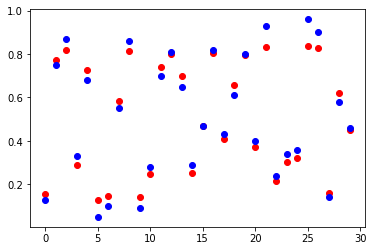

In [15]:
plt.scatter(range(30),y_pred,c="r")
plt.scatter(range(30),ytest,c="b")

### feed new data

In [16]:
a=14
b=15
c=16
d=17
e=18

In [17]:
new=[[[a/100], [b/100], [c/100], [d/100], [e/100]]]

In [18]:
new_arr=np.array(new)

In [19]:
new_arr

array([[[0.14],
        [0.15],
        [0.16],
        [0.17],
        [0.18]]])

In [20]:
pred=model.predict(new_arr)
pred=pred*100
print(pred[0])

[18.508537]
